# Installing the Python-MNIST package to load MNIST data

[Link to Github Repository](https://github.com/sorki/python-mnist)

In [1]:
!pip3 install python-mnist

# Importing Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mnist import MNIST

# Importing Training/Testing Data

In [3]:
data = MNIST("")
train_images, train_labels = data.load_training()
test_images, test_labels = data.load_testing()

# Converting Training/Testing Images/Labels into Tensors from Python Lists

In [4]:
train_images = tf.convert_to_tensor(train_images)
train_labels = tf.convert_to_tensor(train_labels)
test_images = tf.convert_to_tensor(test_images)
test_labels = tf.convert_to_tensor(test_labels)

In [5]:
print("Type of training images: {}".format(type(train_images)))
print("Type of training labels: {}".format(type(train_labels)))
print("Shape of training images: {}".format(train_images.shape))
print("Shape of training labels: {}".format(train_labels.shape))
print("Shape of testing images: {}".format(test_images.shape))
print("Shape of testing labels: {}".format(test_labels.shape))

Type of training images: <class 'tensorflow.python.framework.ops.EagerTensor'>
Type of training labels: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape of training images: (60000, 784)
Shape of training labels: (60000,)
Shape of testing images: (10000, 784)
Shape of testing labels: (10000,)


# Reshaping the Training/Testing Tensors
- The tensors earlier were 2-dimensional but a convolutional neural network needs the tensors to be in a volume. In this case, it shoud be 4-dimensional.

In [6]:
train_images = tf.reshape(train_images, shape=(60000,28,28,1))
print("The Shape of the Training Images is {}".format(train_images.shape))
test_images = tf.reshape(test_images, shape=(10000,28,28,1))
print("The Shape of the Testing Images is {}".format(test_images.shape))

The Shape of the Training Images is (60000, 28, 28, 1)
The Shape of the Testing Images is (10000, 28, 28, 1)


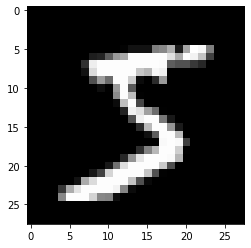

tf.Tensor(5, shape=(), dtype=int32)


In [7]:
plt.figure()
plt.imshow(train_images[0,:,:,0], cmap = "gray")
plt.grid(False)
plt.show()
print(train_labels[0])

# Normalizing the Training/Testing Images
- Each Image has pixel values varying from 0 to 255. Therefore, dividing all the pixel values will normalize them and constrain them to the range [0,1]

In [8]:
train_images = train_images / 255
test_images = test_images / 255

# Plotting the first 25 images in the training set

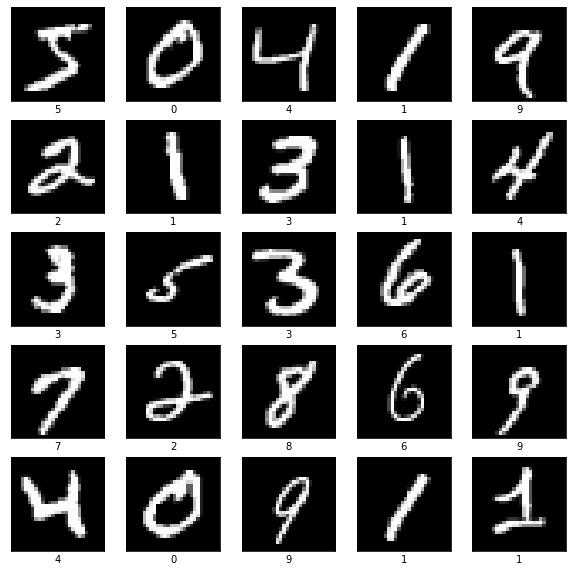

In [9]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i,:,:,0], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Converting the Training/Testing Labels into One-Hot encoded tensors

In [10]:
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=10)
print("The Shape of the One-Hot encoded labels are {}".format(train_labels_one_hot.shape))
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=10)
print("The Shape of the One-Hot encoded labels are {}".format(test_labels_one_hot.shape))

The Shape of the One-Hot encoded labels are (60000, 10)
The Shape of the One-Hot encoded labels are (10000, 10)


# Defining a Keras Sequential Model using TensorFlow

In [11]:
model = tf.keras.Sequential([
                    tf.keras.layers.Conv2D(input_shape = (28,28,1), filters = 32, kernel_size = (3,3), strides=1, padding='valid'),
                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(128, activation = 'relu'),
                    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels_one_hot, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1742 - accuracy: 0.9483
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0606 - accuracy: 0.9814
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0369 - accuracy: 0.9886
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0249 - accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0181 - accuracy: 0.9940


In [14]:
loss, accuracy = model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 2s 7ms/step - loss: 0.0610 - accuracy: 0.9828


In [15]:
print("Testing Loss = {} %".format(loss * 100))

Testing Loss = 6.100672483444214 %


In [16]:
print("Testing Accuracy = {} %".format(accuracy * 100))

Testing Accuracy = 98.28000068664551 %


# Training Accuracy

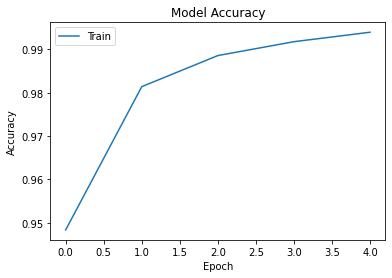

In [17]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Training Loss

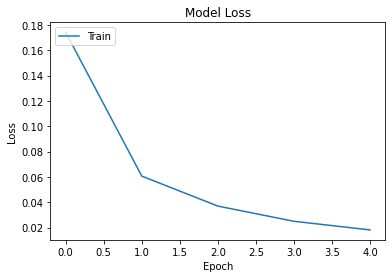

In [18]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Summary of the Sequential Model Used

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


# Plots of the Filters used in the Convolution Layer

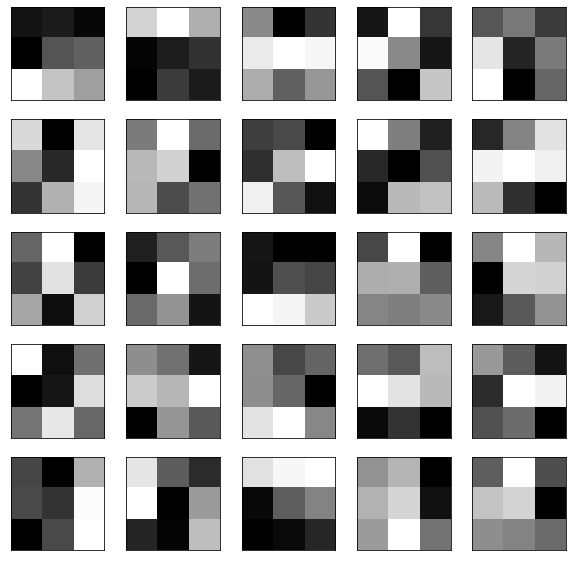

In [20]:
filters, biases = model.layers[0].get_weights()
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(filters[:,:,0,i], cmap='gray')
plt.show()